# DAT file read test

In [1]:
import sys
# !{sys.executable} -m pip install faker
import pandas as pd
import numpy as np
from pathlib import Path
from sqlalchemy import inspect, create_engine

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
data_file = Path("data/sadc_2019_national.dat")

"""
cols = ["sitecode", "sitename", "sitetyype", "siteTypenum", "year", "survyear", "weight", "statum", "PSU", "age", "sex",
"grade", "race4", "race7", "stheight", "stweight", "bmi", "bmipct", "qnobese", "qnowt", "Q66", "Q65", "sexid", "sexid2",
"sexpart", "sexpart2", "q8-q64", "qnfrcig", "qndaycig", "qnfrevp"]
"""
cols = range(0, 200)
df = pd.read_csv(data_file, header=0, delim_whitespace=True, engine='python', on_bad_lines='skip', names=cols, usecols=cols)

In [3]:
df.drop(columns=[0, 1, 2, 3, 4, 5], inplace=True)

In [4]:
display(df.head(2))# display(df[range(0, 20)].head(20))
display(df.tail(2))# display(df[range(0, 20)].tail(20))

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,1991,1,0.5060,12310,29,3538,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,11111,11,22,111,1,1,122233231,6,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,1,1,2,2,1,.,2,.,.,.,.,.,.,.,1,1,.,.,.,2,2,2,.,.,2,.,.,.,.,2,.,.,1,1,2,2,.,.,.,2,1,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,1,1,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,None
1,1991,1,0.3201,11400,33,9423,4,.,2,1,6,.,.,.,.,.,.,.,.,.,.41,3,1,12111,11,52,111,1,1,211111141,1,2,2,.,.,1,.,.,.,.,2,.,.,.,.,.,.,.,.,1,2,2,2,1,.,2,.,.,.,.,.,.,.,2,1,.,.,.,2,2,2,.,.,2,.,.,.,.,2,.,.,2,2,2,2,.,.,.,1,1,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.2,1,1,4,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.


,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
217337,2019,15,1.7753,112,343678,2258522,7,1,3,.,.,1.68,55.79,19.7669,27.56,2,2,.,.,.,.,111,111,1,12,222,11,11,11,111111,1,122111111,.,2,.,.,.,2,2,2,.,.,2,.,.,.,.,2,.,2,2,2,.,.,.,2,2,.,.,.,.,2,2,.,.,2,2,.,.,2,2,2,2,2,2,.,2,.,.,.,2,2,2,2,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,2,.,.,2,2,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,None,None
217338,2019,15,4.7401,112,343678,2258523,7,1,4,2,3,1.65,52.16,19.1589,19.47,2,21,1,1,.,.,111,1111,1,122122,11,21111,111,111111,111,1221111112,2521141,86173,12,1232,.,2,.,.,.,2,2,2,2,.,2,.,.,.,.,2,2,1,2,2,.,.,.,2,2,.,2,2,.,2,2,.,2,2,2,.,.,2,2,2,2,2,2,.,2,2,2,.,2,2,2,2,2,2,.,.,.,2,.,2,2,2,1,1,2,1,.,2,1,2,1,1,.,2,2,.,1,2,2,1,2,2,2,2,2,2,2,2,2,2,.,.,.,.,2,1,1,2,1,2,2,2,2,.,.,1,2,2,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.


In [5]:
# Create a new dataframe while identifying columns
renamed_df = df.rename(columns={
    6: "year",
    7: "survyear",
    8: "weight", 
    9: "stratum",
    10: "PSU",
    11: "UNKN1",
    12: "age_code",
    13: "sex",
    14: "grade",
    15: "race4",
    16: "race7",
    17: "stheight",
    18: "stweight",
    19: "bmi",
    20: "bmipct",
    21: "qnobese",
    22: "qnowt"
})
renamed_df.head()

,year,survyear,weight,stratum,PSU,UNKN1,age_code,sex,grade,race4,race7,stheight,stweight,bmi,bmipct,qnobese,qnowt,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,1991,1,0.5060,12310,29,3538,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,11111,11,22,111,1,1,122233231,6,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,1,1,2,2,1,.,2,.,.,.,.,.,.,.,1,1,.,.,.,2,2,2,.,.,2,.,.,.,.,2,.,.,1,1,2,2,.,.,.,2,1,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,1,1,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,None
1,1991,1,0.3201,11400,33,9423,4,.,2,1,6,.,.,.,.,.,.,.,.,.,.41,3,1,12111,11,52,111,1,1,211111141,1,2,2,.,.,1,.,.,.,.,2,.,.,.,.,.,.,.,.,1,2,2,2,1,.,2,.,.,.,.,.,.,.,2,1,.,.,.,2,2,2,.,.,2,.,.,.,.,2,.,.,2,2,2,2,.,.,.,1,1,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.2,1,1,4,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.
2,1991,1,0.7787,11200,21,11716,5,.,2,1,6,.,.,.,.,.,.,.,.,.,.45,5,3,22111,76,57,734,2,1,41,6,2,1,.,.,1,.,.,.,.,1,.,.,.,.,.,.,.,.,2,2,2,2,1,.,1,1,.,.,.,.,.,.,2,1,.,.,.,1,1,1,.,.,1,.,.,.,.,2,.,.,.,.,.,.,.,.,.,1,1,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,1,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.2,1,3,1,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.
3,1991,1,1.3896,12100,8,13693,6,.,.,4,.,.,.,.,.,.,.,.,.,.,.15,5,8,1,77,27,726,6,6,127823852,1,1,1,.,.,1,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,1,.,1,1,.,.,.,.,.,.,1,1,.,.,.,1,1,1,.,.,1,.,.,.,.,1,.,.,1,1,1,1,1,2,2,1,2,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,1,1,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.2,6,2,1,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.
4,1991,1,0.1250,19006,143,20320,.,2,4,3,4,.,.,.,.,.,.,.,.,.,.32,2,2,22111,63,111,1,1,211111133,1,2,1,.,.,1,.,.,.,.,1,.,.,.,.,.,.,.,.,2,2,2,2,1,.,.,.,.,.,.,.,.,.,2,1,.,.,.,2,2,2,.,.,2,.,.,.,.,2,.,.,2,2,2,2,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.1,1,1,4,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,None


In [14]:
# NEED to fix datatypes first
renamed_df["race7"].value_counts()

6    90500
4    57717
3    46403
2     7670
7     6144
.     5179
1     2411
5     1315
Name: race7, dtype: int64

In [15]:
renamed_df["year"].value_counts()

2009    16410
1993    16296
1997    16262
2015    15624
2011    15425
1999    15349
2003    15214
2017    14765
2007    14041
2005    13917
2019    13677
2001    13601
2013    13583
1991    12271
1995    10904
Name: year, dtype: int64

In [14]:
# Save to local SQL db
# renamed_db = engine # etc

## Data Split
Now we'll split the data into PSU and Survey Questionaires to maximize flexibility in our analysis.


In [7]:
psu_df = renamed_df[["year", "survyear", "weight", "stratum", "PSU", "UNKN1", "age_code", "sex", "grade", "race4", "race7", "stheight", "stweight", "bmi", "bmipct", "qnobese", "qnowt"]].copy()
psu_df.head()


,year,survyear,weight,stratum,PSU,UNKN1,age_code,sex,grade,race4,race7,stheight,stweight,bmi,bmipct,qnobese,qnowt
0,1991,1,0.5060,12310,29,3538,.,.,.,.,.,.,.,.,.,.,.
1,1991,1,0.3201,11400,33,9423,4,.,2,1,6,.,.,.,.,.,.
2,1991,1,0.7787,11200,21,11716,5,.,2,1,6,.,.,.,.,.,.
3,1991,1,1.3896,12100,8,13693,6,.,.,4,.,.,.,.,.,.,.
4,1991,1,0.1250,19006,143,20320,.,2,4,3,4,.,.,.,.,.,.


<AxesSubplot:xlabel='year'>

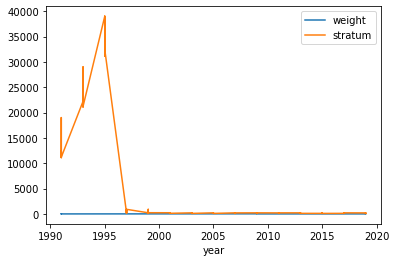

In [11]:
psu_df.plot(x="year", y=["weight", "stratum"])

In [24]:
"""
How old are you?
A. 12 years old or younger
B. 13 years old
C. 14 years old
D. 15 years old
E. 16 years old
F. 17 years old
G. 18 years old or older
"""
# df["age_code"] = df[12]
# df["age_code"].value_counts()

6    55482
5    55447
4    49384
7    34287
3    21367
.      710
1      403
2      259
Name: age_code, dtype: int64

In [25]:
"""
What is your sex?
A. Female
B. Male
"""

# df["sex"] = df[13] #.value_counts()
# df["sex"].value_counts()

1    109540
2    106891
.       908
Name: sex, dtype: int64

In [26]:
"""
In what grade are you?
A. 9th grade
B. 10th grade
C. 11th grade
D. 12th grade
E. Ungraded or other grade
"""
# df["grade"] = df[14]
# df["grade"].value_counts()

3    54324
4    54109
1    53986
2    53604
.     1316
Name: grade, dtype: int64

In [27]:
"""
4-level variable from race and ethnicity questions:

1 = “White”
2 = “Black or African American”
3 = “Hispanic/Latino”
4 = “All Other Races”
"""
# df["race4"] = df[15]
# df["race4"].value_counts()

1    90500
3    57717
2    46403
4    19433
.     3286
Name: race4, dtype: int64

In [58]:
"""
7-level variable from race and ethnicity questions:
1 = “American Indian/Alaska Native”
2 = “Asian”
3 = “Black or African American”
4 = “Hispanic/Latino”
5 = “Native Hawaiian/Other Pacific Islander”
6 = “White”
7 = “Multiple Races (Non-Hispanic)”
"""
# df["race7"] = df[16]
# df["race7"].value_counts()

'\n7-level variable from race and ethnicity questions:\n1 = “American Indian/Alaska Native”\n2 = “Asian”\n3 = “Black or African American”\n4 = “Hispanic/Latino”\n5 = “Native Hawaiian/Other Pacific Islander”\n6 = “White”\n7 = “Multiple Races (Non-Hispanic)”\n'

In [59]:
# # how tall are you without shoes?
# df["stheight"] = df[17]
# df["stheight"].value_counts()

In [60]:
# how much do you weight without shoes?
# df["stweight"] = df[18]
# df["stweight"].head()

In [61]:
# Body mass index (BMI)
# df["bmi"] = df[19]
# df["bmi"].value_counts()

In [62]:
# Student’s BMI percentile
# df["bmipct"] = df[20]
# df["bmipct"].value_counts()

In [63]:
# Obesity indicator
# df["qnobese"] = df[21]
# df["qnobese"].value_counts()

In [64]:
# Overweight indicator
# df["qnowt"] = df[22]
# df["qnowt"].value_counts()

In [51]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,sex,age_code,grade,race4,race7,stheight,stweight,bmi,bmipct,qnobese,qnowt
0,XX,United,States,(XX),National,3,1991,1,0.5060,12310,29,3538,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,11111,11,22,111,1,1,122233231,6,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,1,1,2,2,1,.,2,.,.,.,.,.,.,.,1,1,.,.,.,2,2,2,.,.,2,.,.,.,.,2,.,.,1,1,2,2,.,.,.,2,1,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,1,1,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,None,.,.,.,.,.,.,.,.,.,.,.
1,XX,United,States,(XX),National,3,1991,1,0.3201,11400,33,9423,4,.,2,1,6,.,.,.,.,.,.,.,.,.,.41,3,1,12111,11,52,111,1,1,211111141,1,2,2,.,.,1,.,.,.,.,2,.,.,.,.,.,.,.,.,1,2,2,2,1,.,2,.,.,.,.,.,.,.,2,1,.,.,.,2,2,2,.,.,2,.,.,.,.,2,.,.,2,2,2,2,.,.,.,1,1,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.2,1,1,4,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,4,2,1,6,.,.,.,.,.,.
2,XX,United,States,(XX),National,3,1991,1,0.7787,11200,21,11716,5,.,2,1,6,.,.,.,.,.,.,.,.,.,.45,5,3,22111,76,57,734,2,1,41,6,2,1,.,.,1,.,.,.,.,1,.,.,.,.,.,.,.,.,2,2,2,2,1,.,1,1,.,.,.,.,.,.,2,1,.,.,.,1,1,1,.,.,1,.,.,.,.,2,.,.,.,.,.,.,.,.,.,1,1,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,1,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.2,1,3,1,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,5,2,1,6,.,.,.,.,.,.
3,XX,United,States,(XX),National,3,1991,1,1.3896,12100,8,13693,6,.,.,4,.,.,.,.,.,.,.,.,.,.,.15,5,8,1,77,27,726,6,6,127823852,1,1,1,.,.,1,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,1,.,1,1,.,.,.,.,.,.,1,1,.,.,.,1,1,1,.,.,1,.,.,.,.,1,.,.,1,1,1,1,1,2,2,1,2,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,1,1,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.2,6,2,1,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,6,.,4,.,.,.,.,.,.,.
4,XX,United,States,(XX),National,3,1991,1,0.1250,19006,143,20320,.,2,4,3,4,.,.,.,.,.,.,.,.,.,.32,2,2,22111,63,111,1,1,211111133,1,2,1,.,.,1,.,.,.,.,1,.,.,.,.,.,.,.,.,2,2,2,2,1,.,.,.,.,.,.,.,.,.,2,1,.,.,.,2,2,2,.,.,2,.,.,.,.,2,.,.,2,2,2,2,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.1,1,1,4,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,None,2,.,4,3,4,.,.,.,.,.,.


In [54]:
cols = ["year", "sur_year", "weight", "stratum", "PSU", "UNKN1", "sex", "age_code", "grade", "race4", "race7", "stheight", "stweight", "bmi", "bmipct", "qnobese", "qnowt"]

new_df = df[cols].copy()
new_df.head()

,year,sur_year,weight,stratum,PSU,UNKN1,sex,age_code,grade,race4,race7,stheight,stweight,bmi,bmipct,qnobese,qnowt
0,1991,1,0.5060,12310,29,3538,.,.,.,.,.,.,.,.,.,.,.
1,1991,1,0.3201,11400,33,9423,.,4,2,1,6,.,.,.,.,.,.
2,1991,1,0.7787,11200,21,11716,.,5,2,1,6,.,.,.,.,.,.
3,1991,1,1.3896,12100,8,13693,.,6,.,4,.,.,.,.,.,.,.
4,1991,1,0.1250,19006,143,20320,2,.,4,3,4,.,.,.,.,.,.


In [55]:
new_df["year"].value_counts()

2009    16410
1993    16296
1997    16262
2015    15624
2011    15425
1999    15349
2003    15214
2017    14765
2007    14041
2005    13917
2019    13677
2001    13601
2013    13583
1991    12271
1995    10904
Name: year, dtype: int64

In [9]:
new_df = df[[6, 8, 9, 10, 11]].copy()
new_df.rename(columns={6: "year", 8: "weight", 9: "stratum", 10: "PSU", 11: "age"}, inplace=True)
display(new_df.head())
display(new_df.tail())

,year,weight,stratum,PSU,age
0,1991,0.5060,12310,29,3538
1,1991,0.3201,11400,33,9423
2,1991,0.7787,11200,21,11716
3,1991,1.3896,12100,8,13693
4,1991,0.1250,19006,143,20320


,year,weight,stratum,PSU,age
217334,2019,1.1045,201,330220,2258519
217335,2019,1.1045,201,330220,2258520
217336,2019,1.1045,201,330220,2258521
217337,2019,1.7753,112,343678,2258522
217338,2019,4.7401,112,343678,2258523


<AxesSubplot:xlabel='year'>

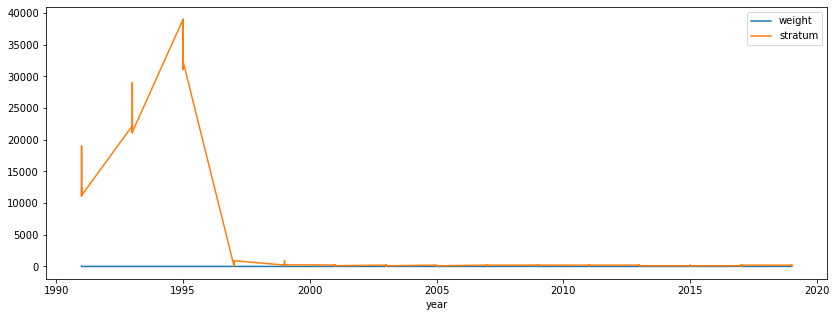

In [21]:
new_df.plot(x='year', y=['weight', 'stratum'], figsize=(14,5))